### Instalando os pacotes

In [1]:
!pip install pandas numpy scikit-learn keras matplotlib plotly yfinance tensorflow seaborn

#### Importação das bibliotecas

In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf
import os
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

from tensorflow.keras.utils import plot_model
import pydotplus as pydot

import plotly.graph_objects as go

2024-07-12 21:50:14.977298: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-12 21:50:14.984092: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-12 21:50:15.029429: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-12 21:50:15.074304: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-12 21:50:15.088274: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-12 21:50:15.123060: I tensorflow/core/platform/cpu_feature_gu

In [3]:
tf.__version__

'2.17.0'

### Obtenção do dataset
Com captação do dia atual

In [4]:
current_date = datetime.now().date().strftime('%Y-%m-%d')
folder = 'datasets'
if not os.path.exists(folder):
    os.makedirs(folder)
    
name = '^GSPC'
file = os.path.join(folder, f'{name}.csv')
data = yf.download(name, start='2004-01-01', end=current_date)
data.to_csv(file)
df = pd.read_csv(file)
df

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-01-02,1111.920044,1118.849976,1105.079956,1108.479980,1108.479980,1153200000
1,2004-01-05,1108.479980,1122.219971,1108.479980,1122.219971,1122.219971,1578200000
2,2004-01-06,1122.219971,1124.459961,1118.439941,1123.670044,1123.670044,1494500000
3,2004-01-07,1123.670044,1126.329956,1116.449951,1126.329956,1126.329956,1704900000
4,2004-01-08,1126.329956,1131.920044,1124.910034,1131.920044,1131.920044,1868400000
...,...,...,...,...,...,...,...
5160,2024-07-05,5537.910156,5570.330078,5531.629883,5567.189941,5567.189941,3253080000
5161,2024-07-08,5572.750000,5583.109863,5562.509766,5572.850098,5572.850098,3185670000
5162,2024-07-09,5584.240234,5590.750000,5574.569824,5576.979980,5576.979980,3232920000
5163,2024-07-10,5591.259766,5635.390137,5586.439941,5633.910156,5633.910156,3336100000


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5160,2024-07-05,5537.910156,5570.330078,5531.629883,5567.189941,5567.189941,3253080000
5161,2024-07-08,5572.750000,5583.109863,5562.509766,5572.850098,5572.850098,3185670000
5162,2024-07-09,5584.240234,5590.750000,5574.569824,5576.979980,5576.979980,3232920000
5163,2024-07-10,5591.259766,5635.390137,5586.439941,5633.910156,5633.910156,3336100000
5164,2024-07-11,5635.209961,5642.450195,5576.529785,5584.540039,5584.540039,4020950000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5165 non-null   object 
 1   Open       5165 non-null   float64
 2   High       5165 non-null   float64
 3   Low        5165 non-null   float64
 4   Close      5165 non-null   float64
 5   Adj Close  5165 non-null   float64
 6   Volume     5165 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 282.6+ KB


### Estatística descritiva do conjunto de dados

In [30]:
df.describe().round(2)

,Open,High,Low,Close,Adj Close,Volume
count,5165.00,5165.00,5165.00,5165.00,5165.00,5.165000e+03
mean,2215.33,2227.65,2202.23,2215.79,2215.79,3.742981e+09
std,1172.34,1178.10,1166.30,1172.67,1172.67,1.292972e+09
min,679.28,695.27,666.79,676.53,676.53,5.045800e+08
25%,1272.58,1280.05,1264.87,1272.87,1272.87,3.065070e+09
50%,1865.00,1874.18,1850.61,1864.85,1864.85,3.676890e+09
75%,2868.88,2887.72,2855.94,2874.56,2874.56,4.313310e+09
max,5635.21,5642.45,5586.44,5633.91,5633.91,1.145623e+10


Correlação entre as variáveis, excludente as séries temporais

In [31]:
df_corr = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
df_corr.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999931,0.999897,0.999821,0.999821,0.177019
High,0.999931,1.000000,0.999862,0.999903,0.999903,0.180196
Low,0.999897,0.999862,1.000000,0.999915,0.999915,0.172072
Close,0.999821,0.999903,0.999915,1.000000,1.000000,0.175966
Adj Close,0.999821,0.999903,0.999915,1.000000,1.000000,0.175966
Volume,0.177019,0.180196,0.172072,0.175966,0.175966,1.000000


<Axes: >

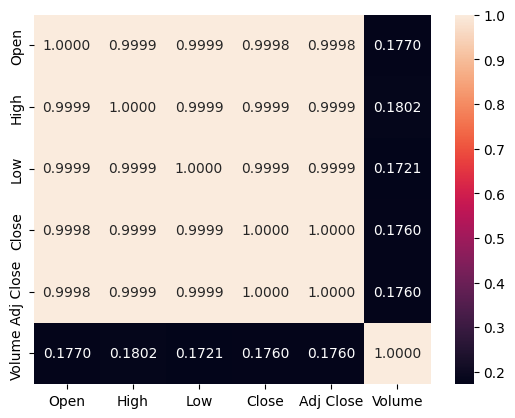

In [32]:
sns.heatmap(df_corr.corr(), annot=True, fmt='.4f')

In [33]:
fig = px.line(df, x='Date', y='Close', title='Fechamento dos preços das ações da S&P 500')
fig.show()

In [34]:
px.box(df, y='Close')

### Preparação dos dados
Optou-se não remover os outliers do dataset, pois eles representavam dados atuais das ações

In [12]:
q1 = df['Close'].quantile(0.25)
q3 = df['Close'].quantile(0.75)
iqr = q3 - q1

factor = 1.5

lower_bound = q1 - factor * iqr
upper_bound = q3 + factor * iqr

outliers = df[(df['Close'] <= lower_bound) | (df['Close'] >= upper_bound)]
outliers


,Date,Open,High,Low,Close,Adj Close,Volume
5126,2024-05-15,5263.259766,5311.759766,5263.259766,5308.149902,5308.149902,4360810000
5127,2024-05-16,5310.069824,5325.490234,5296.189941,5297.100098,5297.100098,3817470000
5128,2024-05-17,5303.100098,5305.450195,5283.589844,5303.270020,5303.270020,3578120000
5129,2024-05-20,5305.350098,5325.319824,5302.399902,5308.129883,5308.129883,3420100000
5130,2024-05-21,5298.689941,5324.319824,5297.870117,5321.410156,5321.410156,3662240000
5131,2024-05-22,5319.279785,5323.180176,5286.009766,5307.009766,5307.009766,3847130000
5133,2024-05-24,5281.450195,5311.649902,5278.390137,5304.720215,5304.720215,3005510000
5134,2024-05-28,5315.910156,5315.910156,5280.890137,5306.040039,5306.040039,3751540000
5137,2024-05-31,5243.209961,5280.330078,5191.680176,5277.509766,5277.509766,5437160000
5138,2024-06-03,5297.149902,5302.109863,5234.319824,5283.399902,5283.399902,4046920000


In [13]:
mean_close = df['Close'].mean()

for outlier in outliers:
    df['Close'] = df['Close'].replace(outlier, mean_close)

### Transformação da série temporal
Variável apresenta-se como string, sendo necessário transformar em datetime

In [14]:
df['Date'].unique().max()

'2024-07-11'

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].unique().max()

Timestamp('2024-07-11 00:00:00')

#### Definição dos legs
Definido para 21 dias

In [35]:
total_rows = len(df)
legs = 21

df_train = df.iloc[:total_rows - legs]
df_test = df.iloc[total_rows - legs:]

df_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-01-02,1111.920044,1118.849976,1105.079956,1108.479980,1108.479980,1153200000
1,2004-01-05,1108.479980,1122.219971,1108.479980,1122.219971,1122.219971,1578200000
2,2004-01-06,1122.219971,1124.459961,1118.439941,1123.670044,1123.670044,1494500000
3,2004-01-07,1123.670044,1126.329956,1116.449951,1126.329956,1126.329956,1704900000
4,2004-01-08,1126.329956,1131.920044,1124.910034,1131.920044,1131.920044,1868400000
...,...,...,...,...,...,...,...
5139,2024-06-04,5278.240234,5298.799805,5257.629883,5291.339844,5291.339844,3707900000
5140,2024-06-05,5314.479980,5354.160156,5297.640137,5354.029785,5354.029785,3591460000
5141,2024-06-06,5357.799805,5362.350098,5335.359863,5352.959961,5352.959961,3609990000
5142,2024-06-07,5343.810059,5375.080078,5331.330078,5346.990234,5346.990234,3692760000


In [36]:
len(df_test)

21

In [18]:
train_set = df_train['Close'].values
train_set

array([1108.47998047, 1122.2199707 , 1123.67004395, ..., 5352.95996094,
       5346.99023438, 5360.79003906])

### Escalonamento dos dados
Intervalo de [0..1]

In [19]:
sc = MinMaxScaler(feature_range=(0,1))
train_set_scaled = sc.fit_transform(train_set.reshape(-1,1))
train_set_scaled

array([[0.09221306],
       [0.09514629],
       [0.09545585],
       ...,
       [0.99832843],
       [0.99705401],
       [1.        ]])

### Parte

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-01-02,1111.920044,1118.849976,1105.079956,1108.479980,1108.479980,1153200000
1,2004-01-05,1108.479980,1122.219971,1108.479980,1122.219971,1122.219971,1578200000
2,2004-01-06,1122.219971,1124.459961,1118.439941,1123.670044,1123.670044,1494500000
3,2004-01-07,1123.670044,1126.329956,1116.449951,1126.329956,1126.329956,1704900000
4,2004-01-08,1126.329956,1131.920044,1124.910034,1131.920044,1131.920044,1868400000
...,...,...,...,...,...,...,...
5160,2024-07-05,5537.910156,5570.330078,5531.629883,5567.189941,5567.189941,3253080000
5161,2024-07-08,5572.750000,5583.109863,5562.509766,5572.850098,5572.850098,3185670000
5162,2024-07-09,5584.240234,5590.750000,5574.569824,5576.979980,5576.979980,3232920000
5163,2024-07-10,5591.259766,5635.390137,5586.439941,5633.910156,5633.910156,3336100000


In [8]:
total_rows = len(df)
legs = 21

df_train = df.iloc[:total_rows - legs]
df_test = df.iloc[total_rows - legs:]



In [10]:
precos_reais = df_test['Close'].values
precos_reais

array([5375.31982422, 5421.02978516, 5433.74023438, 5431.60009766,
       5473.22998047, 5487.02978516, 5473.16992188, 5464.62011719,
       5447.87011719, 5469.29980469, 5477.89990234, 5482.87011719,
       5460.47998047, 5475.08984375, 5509.00976562, 5537.02001953,
       5567.18994141, 5572.85009766, 5576.97998047, 5633.91015625,
       5584.54003906])

In [12]:
normalizando = MinMaxScaler(feature_range=(0,1))
dados_normalizados = normalizando.fit_transform(df_train['Close'].values.reshape(-1,1))

previsao_dias = 60

x_treinar, y_treinar = [], []

for x in range(previsao_dias, len(dados_normalizados)):
    x_treinar.append(dados_normalizados[x-previsao_dias:x, 0])
    y_treinar.append(dados_normalizados[x, 0 ])
    
x_treinar, y_treinar = np.array(x_treinar), np.array(y_treinar)
x_treinar = np.reshape(x_treinar, (x_treinar.shape[0], x_treinar.shape[1], 1))

In [14]:
modelo = Sequential()

modelo.add(LSTM(units=100, return_sequences=True, input_shape=(x_treinar.shape[1], 1)))
modelo.add(Dropout(0.2))

modelo.add(LSTM(units=50, return_sequences=True))
modelo.add(Dropout(0.2))

modelo.add(LSTM(units=50))
modelo.add(Dropout(0.2))

modelo.add(Dense(units = 1, activation='linear')) #Prevendo o proximo valor da acao

modelo.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error'])
modelo.fit(x_treinar, y_treinar, epochs = 100, batch_size = 32)


/home/balda/anaconda3/envs/orange3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 29s 140ms/step - loss: 0.0139 - mean_absolute_error: 0.0720
Epoch 2/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 40s 135ms/step - loss: 0.0033 - mean_absolute_error: 0.0388
Epoch 3/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 27s 170ms/step - loss: 0.0023 - mean_absolute_error: 0.0313
Epoch 4/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 37s 143ms/step - loss: 0.0022 - mean_absolute_error: 0.0302
Epoch 5/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 23s 147ms/step - loss: 0.0018 - mean_absolute_error: 0.0281
Epoch 6/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 42s 155ms/step - loss: 0.0016 - mean_absolute_error: 0.0259
Epoch 7/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - loss: 0.0015 - mean_absolute_error: 0.0253
Epoch 8/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 17s 109ms/step - loss: 0.0013 - mean_absolute_error: 0.0237
Epoch 9/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 28s 159ms/step - loss: 0.0012 - mean_absolute_error: 0.0232
Epoch 10/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 19s 119ms/step - loss: 0.0011 - mean_absolute_err

In [15]:
total_dados = pd.concat((df_train['Close'], df_test['Close']), axis = 0)

modelo_entrada = total_dados[len(total_dados) - len(df_test) - previsao_dias:].values
modelo_entrada = modelo_entrada.reshape(-1, 1)
modelo_entrada = normalizando.transform(modelo_entrada)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


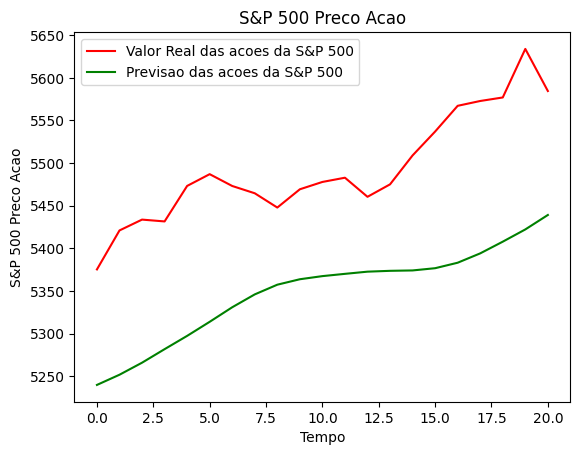

In [18]:
x_teste = []

for x in range(previsao_dias, len(modelo_entrada)):
    x_teste.append(modelo_entrada[x-previsao_dias:x, 0])
    
x_teste = np.array(x_teste)
x_teste = np.reshape(x_teste, (x_teste.shape[0], x_teste.shape[1], 1))

previsao_precos = modelo.predict(x_teste)
previsao_precos = normalizando.inverse_transform(previsao_precos)

#Representando Graficamente as Previsoes
plt.plot(precos_reais, color ='red', label = f"Valor Real das acoes da S&P 500")
plt.plot(previsao_precos, color="green", label = f"Previsao das acoes da S&P 500" )
plt.title(f"S&P 500 Preco Acao")
plt.xlabel('Tempo')
plt.ylabel(f"S&P 500 Preco Acao")
plt.legend()
plt.show()

In [20]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(range(len(precos_reais))), y=precos_reais, mode='lines', 
                         name=f'Dados reais das ações do SP500',
              line=dict(color='red')))

fig.add_trace(go.Scatter(x=list(range(len(previsao_precos))), y=previsao_precos, mode='lines',
                         name=f'Previsão de fechamento das ações SP500',
                         line=dict(color='blue')))

fig.update_layout(title='Previsão de fechamento das ações', xaxis_title='Tempo', yaxis_title='Preço de fechamento', legend_title='Legenda')

fig.show()

In [19]:
dados_reais =  [modelo_entrada[len(modelo_entrada) + 1 - previsao_dias:len(modelo_entrada + 1), 0]]
dados_reais =  np.array(dados_reais)
dados_reais = np.reshape(dados_reais, (dados_reais.shape[0], dados_reais.shape[1], 1))

previsao = modelo.predict(dados_reais)
previsao = normalizando.inverse_transform(previsao)

print(f"Previsão para amanha: {previsao}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Previsao para amanha: [[5453.709]]


### Split dos dados train e test

In [20]:
interval_between_days = 60

X_train = []
y_train = []

for i in range(interval_between_days, len(train_set)):
    X_train.append(train_set_scaled[i-interval_between_days:i, 0])
    y_train.append(train_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [21]:
X_train.shape, y_train.shape

((5084, 60), (5084,))

### Treino

Transformação para 3D, para aceitação do keras

In [22]:
batch_size = len(X_train)
time_steps = interval_between_days
features = 1

X_train = np.reshape(X_train, (batch_size, time_steps, features))

In [23]:
X_train.shape

(5084, 60, 1)

In [24]:
rnn = Sequential()

In [25]:
rnn.add(LSTM(units=100, return_sequences=True, input_shape=(time_steps, features)))
rnn.add(Dropout(0.3))

rnn.add(LSTM(units=50, return_sequences=True))
rnn.add(Dropout(0.3))

rnn.add(LSTM(units=50, return_sequences=True))
rnn.add(Dropout(0.3))

rnn.add(LSTM(units=50))
rnn.add(Dropout(0.3))

rnn.add(Dense(units=1, activation='linear'))

/home/balda/anaconda3/envs/orange3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [26]:
plot_model(rnn, to_file='network_model.png', 
                show_shapes=True, 
                show_layer_names=True,
                expand_nested=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [27]:
rnn.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error'])
rnn.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 31s 149ms/step - loss: 0.0191 - mean_absolute_error: 0.0858
Epoch 2/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 25s 159ms/step - loss: 0.0050 - mean_absolute_error: 0.0466
Epoch 3/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - loss: 0.0034 - mean_absolute_error: 0.0386
Epoch 4/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - loss: 0.0032 - mean_absolute_error: 0.0382
Epoch 5/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 23s 142ms/step - loss: 0.0025 - mean_absolute_error: 0.0339
Epoch 6/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 23s 144ms/step - loss: 0.0023 - mean_absolute_error: 0.0326
Epoch 7/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 26s 163ms/step - loss: 0.0021 - mean_absolute_error: 0.0318
Epoch 8/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 24s 154ms/step - loss: 0.0020 - mean_absolute_error: 0.0305
Epoch 9/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 19s 121ms/step - loss: 0.0020 - mean_absolute_error: 0.0305
Epoch 10/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 22s 135ms/step - loss: 0.0021 - mean_absolute_error: 0.0304

In [28]:
closure_real = df_test['Close'].values

dataset_total = pd.concat((df['Close'], df_test['Close']), axis=0)
inputs = dataset_total[len(dataset_total) - len(df_test) - interval_between_days:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

inputs = sc.transform(inputs)

In [29]:
X_test = []
for i in range(interval_between_days, len(inputs)):
  X_test.append(inputs[i-interval_between_days:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [30]:
print(f'Previsão oficial: {rnn.predict(X_test)}')
print(f'Valor real: {sc.inverse_transform(rnn.predict(X_test))}')

final_variation = sc.inverse_transform(rnn.predict(X_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Previsão oficial: [[-0.11664355]
 [-0.11664313]
 [-0.11664292]
 [-0.11664292]
 [-0.11664304]
 [-0.1166434 ]
 [-0.11664379]
 [-0.1166442 ]
 [-0.1166445 ]
 [-0.1166448 ]
 [-0.11664513]
 [-0.11664534]
 [-0.11664549]
 [-0.1166456 ]
 [-0.11664566]
 [-0.11664563]
 [-0.11664557]
 [-0.1166454 ]
 [-0.11664516]
 [-0.11664483]
 [-0.11664432]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Valor real: [[130.14133]
 [130.14328]
 [130.14426]
 [130.14426]
 [130.14369]
 [130.14203]
 [130.14021]
 [130.13826]
 [130.13686]
 [130.13547]
 [130.13393]
 [130.13295]
 [130.13225]
 [130.1317 ]
 [130.13141]
 [130.13155]
 [130.13184]
 [130.13268]
 [130.13379]
 [130.13531]
 [130.1377 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


### Avaliação de resultados

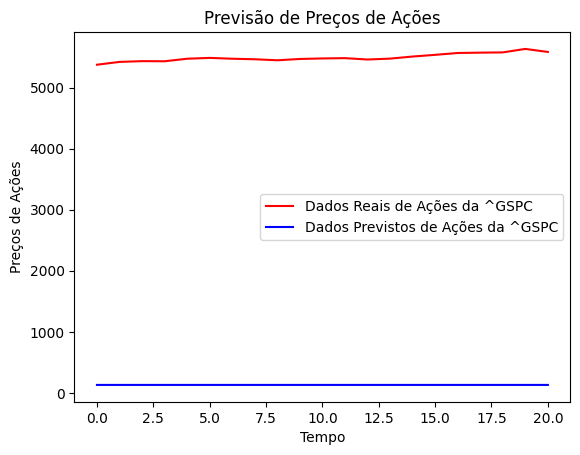

In [31]:
plt.plot(closure_real, color = 'red', label = f'Dados Reais de Ações da {name}')
plt.plot(final_variation, color = 'blue', label = f'Dados Previstos de Ações da {name}')
plt.title('Previsão de Preços de Ações')
plt.xlabel('Tempo')
plt.ylabel('Preços de Ações')
plt.legend()
plt.show()

In [32]:

fig = go.Figure()

fig.add_trace(go.Scatter(x=list(range(len(closure_real))), y=closure_real, mode='lines', 
                         name=f'Dados reais das ações do {name}',
              line=dict(color='red')))

fig.add_trace(go.Scatter(x=list(range(len(final_variation))), y=final_variation, mode='lines',
                         name=f'Previsão de fechamento das ações {name}',
                         line=dict(color='blue')))

fig.update_layout(title='Previsão de fechamento das ações', xaxis_title='Tempo', yaxis_title='Preço de fechamento', legend_title='Legenda')

fig.show()